Starting simplified composer classification pipeline...
NumPy version: 1.26.4
pretty_midi available
Starting Simplified Composer Classification Pipeline
SIMPLIFIED COMPOSER CLASSIFICATION PIPELINE
Compatible with NumPy 2.x

STEP 1: DATA COLLECTION
Found 1659 MIDI files

Composer Distribution:
  Bach: 1049 files
  Mozart: 259 files
  Chopin: 138 files
  Beethoven: 213 files

STEP 2: DATA PRE-PROCESSING
Processed 10/1659 files...
Processed 20/1659 files...
Processed 30/1659 files...
Processed 40/1659 files...
Processed 50/1659 files...
Processed 60/1659 files...
Processed 70/1659 files...
Processed 80/1659 files...
Processed 90/1659 files...
Processed 100/1659 files...
Processed 110/1659 files...
Processed 120/1659 files...
Processed 130/1659 files...
Processed 140/1659 files...
Processed 150/1659 files...
Processed 160/1659 files...
Processed 170/1659 files...
Processed 180/1659 files...
Processed 190/1659 files...
Processed 200/1659 files...
Processed 210/1659 files...
Processed 220/16

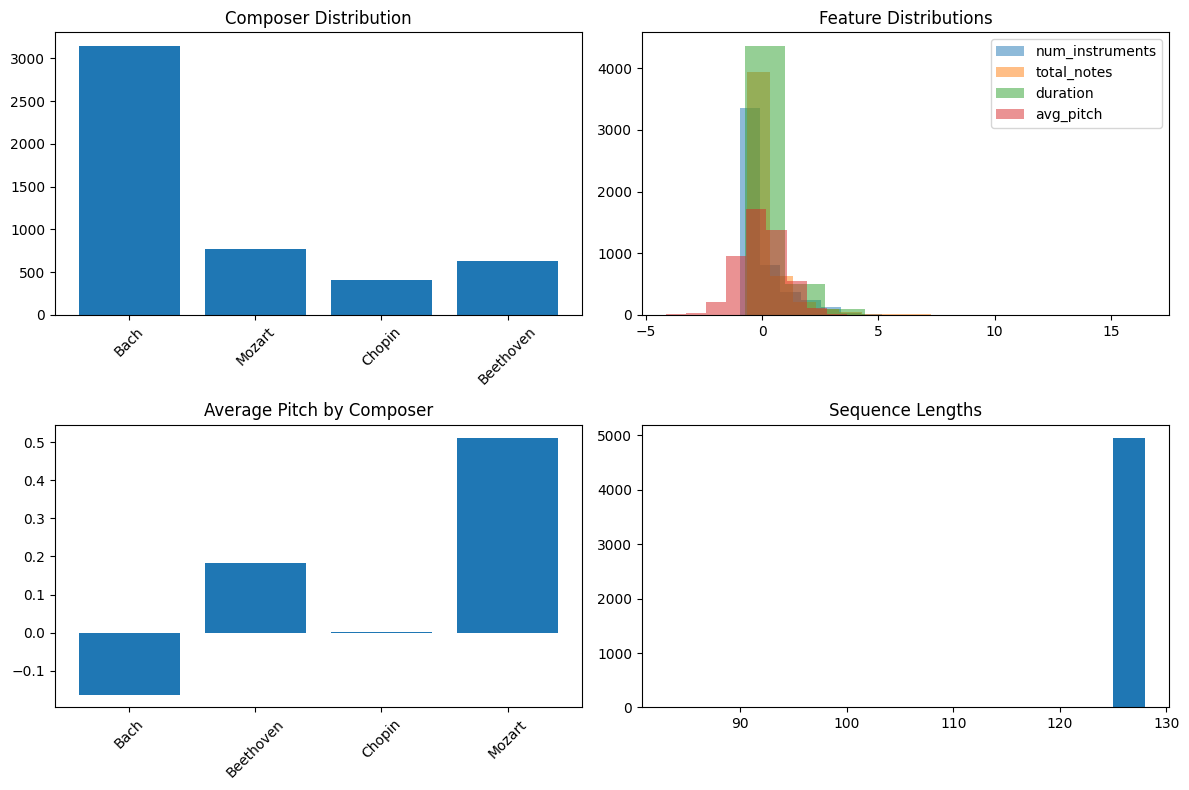


DATA SUMMARY
Total pieces: 4968
Features: 20
Sequence length: 128
Piano roll shape: (1500, 49)
  Bach: 3147 pieces (63.3%)
  Mozart: 774 pieces (15.6%)
  Chopin: 411 pieces (8.3%)
  Beethoven: 636 pieces (12.8%)
Data saved to composer_features_simplified.pkl

PIPELINE COMPLETED SUCCESSFULLY!

Next Steps for Deep Learning Models:
1. Split data: train_test_split(X, y, test_size=0.2)
2. Build LSTM model using X_sequences
3. Build CNN model using X_piano_rolls
4. Build Dense model using X_features
5. Train and evaluate models

PREPARING DATA FOR TRAINING
Training samples: 3974
Testing samples: 994
Number of classes: 4

Training set distribution:
  Class 2: 324 samples
  Class 0: 2489 samples
  Class 3: 636 samples
  Class 1: 525 samples

Test set distribution:
  Class 0: 658 samples
  Class 3: 138 samples
  Class 2: 87 samples
  Class 1: 111 samples

SAMPLE MODEL ARCHITECTURES

# LSTM Model Architecture (using TensorFlow/Keras)
def create_lstm_model(sequence_length=128, n_features=4, n_cl

In [1]:
# Simplified Composer Classification - NumPy 2.x Compatible
# This version avoids problematic dependencies while maintaining core functionality

import os
import pickle
import warnings
warnings.filterwarnings('ignore')

# Essential imports only
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

print("Starting simplified composer classification pipeline...")
print(f"NumPy version: {np.__version__}")

# Install and import pretty_midi (essential for MIDI processing)
try:
    import pretty_midi
    print("pretty_midi available")
except ImportError:
    print("Installing pretty_midi...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'pretty-midi'])
    import pretty_midi
    print("pretty_midi installed and imported")

# Simple label encoder (avoiding sklearn for now)
class SimpleLabelEncoder:
    def __init__(self):
        self.classes_ = None
        self.class_to_idx = {}
        
    def fit_transform(self, y):
        unique_labels = list(set(y))
        unique_labels.sort()
        self.classes_ = unique_labels
        self.class_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
        return np.array([self.class_to_idx[label] for label in y])
    
    def transform(self, y):
        return np.array([self.class_to_idx[label] for label in y])
    
    def inverse_transform(self, y):
        return [self.classes_[idx] for idx in y]

class SimplifiedMIDIProcessor:
    """
    Simplified MIDI processor that avoids problematic dependencies
    while maintaining core functionality for composer classification.
    """
    
    def __init__(self, data_path):
        self.data_path = data_path
        self.composers = ['Bach', 'Beethoven', 'Chopin', 'Mozart']
        self.label_encoder = SimpleLabelEncoder()
        self.midi_files = []
        self.processed_files = []
        self.processed_data = {}
        
    def collect_data(self):
        """Step 1: Data Collection - Find MIDI files"""
        print("\n" + "=" * 50)
        print("STEP 1: DATA COLLECTION")
        print("=" * 50)
        
        midi_files = []
        
        # Walk through directory structure
        for root, dirs, files in os.walk(self.data_path):
            for file in files:
                if file.lower().endswith(('.mid', '.midi')):
                    file_path = os.path.join(root, file)
                    composer = self.identify_composer(file_path, file)
                    if composer:
                        midi_files.append({
                            'file_path': file_path,
                            'filename': file,
                            'composer': composer
                        })
        
        print(f"Found {len(midi_files)} MIDI files")
        
        # Display distribution
        composer_counts = Counter([f['composer'] for f in midi_files])
        print("\nComposer Distribution:")
        for composer, count in composer_counts.items():
            print(f"  {composer}: {count} files")
        
        self.midi_files = midi_files
        return midi_files
    
    def identify_composer(self, file_path, filename):
        """Identify composer from path or filename"""
        path_lower = file_path.lower()
        filename_lower = filename.lower()
        
        for composer in self.composers:
            if composer.lower() in path_lower or composer.lower() in filename_lower:
                return composer
        return None
    
    def preprocess_data(self, apply_augmentation=False):
        """Step 2: Data Pre-processing"""
        print("\n" + "=" * 50)
        print("STEP 2: DATA PRE-PROCESSING")
        print("=" * 50)
        
        processed_files = []
        failed_files = []
        
        for i, midi_info in enumerate(self.midi_files):
            try:
                # Load MIDI file
                midi_data = pretty_midi.PrettyMIDI(midi_info['file_path'])
                
                # Basic validation
                if len(midi_data.instruments) == 0:
                    failed_files.append((midi_info['file_path'], "No instruments"))
                    continue
                
                # Keep only melodic instruments
                melodic_instruments = [inst for inst in midi_data.instruments if not inst.is_drum]
                if len(melodic_instruments) == 0:
                    failed_files.append((midi_info['file_path'], "No melodic instruments"))
                    continue
                
                # Store processed data
                processed_info = midi_info.copy()
                processed_info['midi_data'] = midi_data
                processed_info['melodic_instruments'] = melodic_instruments
                processed_files.append(processed_info)
                
                # Simple augmentation (transpose only)
                if apply_augmentation:
                    for semitones in [-2, 2]:  # Limited augmentation
                        try:
                            augmented_midi = self.transpose_midi(midi_data, semitones)
                            aug_info = processed_info.copy()
                            aug_info['midi_data'] = augmented_midi
                            aug_info['filename'] = f"{midi_info['filename']}_transpose_{semitones}"
                            processed_files.append(aug_info)
                        except:
                            continue
                
                if (i + 1) % 10 == 0:
                    print(f"Processed {i + 1}/{len(self.midi_files)} files...")
                    
            except Exception as e:
                failed_files.append((midi_info['file_path'], str(e)))
                continue
        
        print(f"\nSuccessfully processed: {len(processed_files)} files")
        print(f"Failed to process: {len(failed_files)} files")
        
        self.processed_files = processed_files
        return processed_files
    
    def transpose_midi(self, midi_data, semitones):
        """Simple MIDI transposition"""
        new_midi = pretty_midi.PrettyMIDI()
        
        for instrument in midi_data.instruments:
            if instrument.is_drum:
                new_midi.instruments.append(instrument)
            else:
                new_instrument = pretty_midi.Instrument(
                    program=instrument.program,
                    is_drum=instrument.is_drum,
                    name=instrument.name
                )
                
                for note in instrument.notes:
                    new_pitch = note.pitch + semitones
                    if 0 <= new_pitch <= 127:
                        new_note = pretty_midi.Note(
                            velocity=note.velocity,
                            pitch=new_pitch,
                            start=note.start,
                            end=note.end
                        )
                        new_instrument.notes.append(new_note)
                
                new_midi.instruments.append(new_instrument)
        
        return new_midi
    
    def extract_features(self, sequence_length=128):
        """Step 3: Feature Extraction"""
        print("\n" + "=" * 50)
        print("STEP 3: FEATURE EXTRACTION")
        print("=" * 50)
        
        all_features = []
        all_labels = []
        all_sequences = []
        all_piano_rolls = []
        
        for i, midi_info in enumerate(self.processed_files):
            try:
                midi_data = midi_info['midi_data']
                composer = midi_info['composer']
                
                # Extract features
                features = self.extract_basic_features(midi_data)
                sequence = self.extract_note_sequence(midi_data, sequence_length)
                piano_roll = self.extract_piano_roll(midi_data)
                
                if features is not None and sequence is not None and piano_roll is not None:
                    all_features.append(features)
                    all_labels.append(composer)
                    all_sequences.append(sequence)
                    all_piano_rolls.append(piano_roll)
                
                if (i + 1) % 20 == 0:
                    print(f"Extracted features from {i + 1}/{len(self.processed_files)} files...")
                    
            except Exception as e:
                print(f"Feature extraction failed for {midi_info['filename']}: {e}")
                continue
        
        print(f"\nSuccessfully extracted features from {len(all_features)} files")
        
        # Convert to arrays
        X_features = np.array(all_features)
        X_sequences = np.array(all_sequences)
        X_piano_rolls = np.array(all_piano_rolls)
        y = np.array(all_labels)
        
        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        
        # Simple standardization
        X_features_scaled = self.standardize_features(X_features)
        
        print(f"Feature matrix shape: {X_features_scaled.shape}")
        print(f"Sequence matrix shape: {X_sequences.shape}")
        print(f"Piano roll matrix shape: {X_piano_rolls.shape}")
        print(f"Labels shape: {y_encoded.shape}")
        
        self.processed_data = {
            'X_features': X_features_scaled,
            'X_sequences': X_sequences,
            'X_piano_rolls': X_piano_rolls,
            'y': y_encoded,
            'y_labels': y,
            'feature_names': self.get_feature_names()
        }
        
        return self.processed_data
    
    def extract_basic_features(self, midi_data):
        """Extract essential musical features"""
        try:
            # Collect all notes
            all_notes = []
            for instrument in midi_data.instruments:
                if not instrument.is_drum:
                    all_notes.extend(instrument.notes)
            
            if len(all_notes) == 0:
                return None
            
            # Basic features
            features = []
            
            # 1. Piece statistics
            features.extend([
                len(midi_data.instruments),
                len(all_notes),
                midi_data.get_end_time()
            ])
            
            # 2. Pitch features
            pitches = [note.pitch for note in all_notes]
            features.extend([
                np.mean(pitches),
                np.std(pitches),
                np.min(pitches),
                np.max(pitches),
                np.max(pitches) - np.min(pitches)
            ])
            
            # 3. Duration features
            durations = [note.end - note.start for note in all_notes]
            features.extend([
                np.mean(durations),
                np.std(durations),
                np.min(durations),
                np.max(durations)
            ])
            
            # 4. Velocity features
            velocities = [note.velocity for note in all_notes]
            features.extend([
                np.mean(velocities),
                np.std(velocities),
                np.min(velocities),
                np.max(velocities)
            ])
            
            # 5. Interval analysis
            sorted_notes = sorted(all_notes, key=lambda x: x.start)
            intervals = []
            for i in range(1, min(len(sorted_notes), 100)):  # Limit for performance
                interval = sorted_notes[i].pitch - sorted_notes[i-1].pitch
                intervals.append(abs(interval))
            
            if intervals:
                features.extend([
                    np.mean(intervals),
                    np.std(intervals)
                ])
            else:
                features.extend([0, 0])
            
            # 6. Rhythmic features
            iois = []
            for i in range(1, min(len(sorted_notes), 100)):
                ioi = sorted_notes[i].start - sorted_notes[i-1].start
                if ioi > 0:
                    iois.append(ioi)
            
            if iois:
                features.extend([
                    np.mean(iois),
                    np.std(iois)
                ])
            else:
                features.extend([0, 0])
            
            return np.array(features)
            
        except Exception as e:
            print(f"Feature extraction error: {e}")
            return None
    
    def extract_note_sequence(self, midi_data, sequence_length):
        """Extract note sequence for LSTM"""
        try:
            all_notes = []
            for instrument in midi_data.instruments:
                if not instrument.is_drum:
                    for note in instrument.notes:
                        all_notes.append([
                            note.start,
                            note.pitch,
                            note.velocity,
                            note.end - note.start
                        ])
            
            if len(all_notes) == 0:
                return None
            
            # Sort by start time
            all_notes = sorted(all_notes, key=lambda x: x[0])
            
            # Pad or truncate
            if len(all_notes) > sequence_length:
                sequence = all_notes[:sequence_length]
            else:
                sequence = all_notes + [[0, 0, 0, 0]] * (sequence_length - len(all_notes))
            
            return np.array(sequence)
            
        except:
            return None
    
    def extract_piano_roll(self, midi_data, fs=50, max_time=30):
        """Extract simplified piano roll"""
        try:
            piano_roll = midi_data.get_piano_roll(fs=fs)
            
            # Limit time and pitch range
            max_frames = max_time * fs
            if piano_roll.shape[1] > max_frames:
                piano_roll = piano_roll[:, :max_frames]
            else:
                padding = max_frames - piano_roll.shape[1]
                piano_roll = np.pad(piano_roll, ((0, 0), (0, padding)), mode='constant')
            
            # Focus on middle piano range (C3 to C7)
            piano_roll = piano_roll[48:97, :]  # MIDI notes 48-96
            
            return piano_roll.T  # Time first
            
        except:
            return None
    
    def standardize_features(self, X):
        """Simple feature standardization"""
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        std[std == 0] = 1  # Avoid division by zero
        return (X - mean) / std
    
    def get_feature_names(self):
        """Get feature names"""
        return [
            'num_instruments', 'total_notes', 'duration',
            'avg_pitch', 'pitch_std', 'min_pitch', 'max_pitch', 'pitch_range',
            'avg_duration', 'duration_std', 'min_duration', 'max_duration',
            'avg_velocity', 'velocity_std', 'min_velocity', 'max_velocity',
            'avg_interval', 'interval_std', 'avg_ioi', 'ioi_std'
        ]
    
    def visualize_data(self):
        """Simple visualization"""
        if not self.processed_data:
            print("No processed data available.")
            return
        
        try:
            fig, axes = plt.subplots(2, 2, figsize=(12, 8))
            
            # Composer distribution
            composer_counts = Counter(self.processed_data['y_labels'])
            axes[0, 0].bar(composer_counts.keys(), composer_counts.values())
            axes[0, 0].set_title('Composer Distribution')
            axes[0, 0].tick_params(axis='x', rotation=45)
            
            # Feature distribution (first few features)
            for i, feature_name in enumerate(self.get_feature_names()[:4]):
                axes[0, 1].hist(self.processed_data['X_features'][:, i], 
                               alpha=0.5, label=feature_name)
            axes[0, 1].set_title('Feature Distributions')
            axes[0, 1].legend()
            
            # Average pitch by composer
            pitch_data = []
            for i, label in enumerate(self.processed_data['y_labels']):
                pitch_data.append([label, self.processed_data['X_features'][i, 3]])
            
            df = pd.DataFrame(pitch_data, columns=['Composer', 'Avg_Pitch'])
            pitch_by_composer = df.groupby('Composer')['Avg_Pitch'].mean()
            axes[1, 0].bar(pitch_by_composer.index, pitch_by_composer.values)
            axes[1, 0].set_title('Average Pitch by Composer')
            axes[1, 0].tick_params(axis='x', rotation=45)
            
            # Sequence lengths
            seq_lengths = [np.sum(seq[:, 1] > 0) for seq in self.processed_data['X_sequences']]
            axes[1, 1].hist(seq_lengths, bins=15)
            axes[1, 1].set_title('Sequence Lengths')
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Visualization failed: {e}")
        
        # Print summary
        print("\n" + "=" * 50)
        print("DATA SUMMARY")
        print("=" * 50)
        print(f"Total pieces: {len(self.processed_data['y'])}")
        print(f"Features: {self.processed_data['X_features'].shape[1]}")
        print(f"Sequence length: {self.processed_data['X_sequences'].shape[1]}")
        print(f"Piano roll shape: {self.processed_data['X_piano_rolls'].shape[1:]}")
        
        composer_counts = Counter(self.processed_data['y_labels'])
        for composer, count in composer_counts.items():
            pct = (count / len(self.processed_data['y'])) * 100
            print(f"  {composer}: {count} pieces ({pct:.1f}%)")
    
    def save_data(self, filename='simplified_composer_data.pkl'):
        """Save processed data"""
        with open(filename, 'wb') as f:
            pickle.dump({
                'processed_data': self.processed_data,
                'label_encoder': self.label_encoder
            }, f)
        print(f"Data saved to {filename}")
    
    def load_data(self, filename='simplified_composer_data.pkl'):
        """Load processed data"""
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        self.processed_data = data['processed_data']
        self.label_encoder = data['label_encoder']
        print(f"Data loaded from {filename}")

def run_simplified_pipeline():
    """
    Run the complete simplified pipeline for composer classification
    """
    print("=" * 60)
    print("SIMPLIFIED COMPOSER CLASSIFICATION PIPELINE")
    print("Compatible with NumPy 2.x")
    print("=" * 60)
    
    # Update this path to your actual MIDI files location
    data_path = "/Users/mustafayunus/Downloads/Final_Project"
    
    # Initialize processor
    processor = SimplifiedMIDIProcessor(data_path)
    
    try:
        # Step 1: Collect Data
        midi_files = processor.collect_data()
        
        if len(midi_files) == 0:
            print("\nNO MIDI FILES FOUND!")
            print("Please check:")
            print(f"1. Path exists: {data_path}")
            print("2. MIDI files (.mid, .midi) are present")
            print("3. Files contain composer names (Bach, Beethoven, Chopin, Mozart)")
            return None
        
        # Step 2: Preprocess Data
        processed_files = processor.preprocess_data(apply_augmentation=True)
        
        if len(processed_files) == 0:
            print("\nNO FILES COULD BE PROCESSED!")
            print("Check MIDI file formats and content")
            return None
        
        # Step 3: Extract Features
        processed_data = processor.extract_features(sequence_length=128)
        
        if not processed_data or len(processed_data['y']) == 0:
            print("\nFEATURE EXTRACTION FAILED!")
            return None
        
        # Visualize results
        processor.visualize_data()
        
        # Save processed data
        processor.save_data('composer_features_simplified.pkl')
        
        print("\n" + "=" * 60)
        print("PIPELINE COMPLETED SUCCESSFULLY!")
        print("=" * 60)
        print("\nNext Steps for Deep Learning Models:")
        print("1. Split data: train_test_split(X, y, test_size=0.2)")
        print("2. Build LSTM model using X_sequences")
        print("3. Build CNN model using X_piano_rolls") 
        print("4. Build Dense model using X_features")
        print("5. Train and evaluate models")
        
        # Return data for further use
        return processed_data
        
    except Exception as e:
        print(f"\nPIPELINE FAILED: {e}")
        print("Try checking your file paths and MIDI file formats")
        return None

def prepare_data_for_training(processed_data, test_size=0.2, random_state=42):
    """
    Prepare data for training deep learning models
    """
    print("\n" + "=" * 50)
    print("PREPARING DATA FOR TRAINING")
    print("=" * 50)
    
    if not processed_data:
        print("No processed data available!")
        return None
    
    # Get the data
    X_features = processed_data['X_features']
    X_sequences = processed_data['X_sequences'] 
    X_piano_rolls = processed_data['X_piano_rolls']
    y = processed_data['y']
    
    # Simple train-test split
    n_samples = len(y)
    n_train = int(n_samples * (1 - test_size))
    
    # Shuffle indices
    np.random.seed(random_state)
    indices = np.random.permutation(n_samples)
    
    train_idx = indices[:n_train]
    test_idx = indices[n_train:]
    
    # Split data
    data_splits = {
        'X_features_train': X_features[train_idx],
        'X_features_test': X_features[test_idx],
        'X_sequences_train': X_sequences[train_idx],
        'X_sequences_test': X_sequences[test_idx],
        'X_piano_rolls_train': X_piano_rolls[train_idx],
        'X_piano_rolls_test': X_piano_rolls[test_idx],
        'y_train': y[train_idx],
        'y_test': y[test_idx]
    }
    
    print(f"Training samples: {len(train_idx)}")
    print(f"Testing samples: {len(test_idx)}")
    print(f"Number of classes: {len(np.unique(y))}")
    
    # Show class distribution
    train_counts = Counter(data_splits['y_train'])
    test_counts = Counter(data_splits['y_test'])
    
    print("\nTraining set distribution:")
    for class_idx, count in train_counts.items():
        print(f"  Class {class_idx}: {count} samples")
    
    print("\nTest set distribution:")
    for class_idx, count in test_counts.items():
        print(f"  Class {class_idx}: {count} samples")
    
    return data_splits

def create_sample_models():
    """
    Create sample model architectures (pseudocode for reference)
    Note: Actual implementation would require TensorFlow/PyTorch
    """
    print("\n" + "=" * 50)
    print("SAMPLE MODEL ARCHITECTURES")
    print("=" * 50)
    
    print("""
# LSTM Model Architecture (using TensorFlow/Keras)
def create_lstm_model(sequence_length=128, n_features=4, n_classes=4):
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    
    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(sequence_length, n_features)),
        Dropout(0.3),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# CNN Model Architecture 
def create_cnn_model(input_shape, n_classes=4):
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
    
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(n_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Dense Neural Network for extracted features
def create_dense_model(n_features, n_classes=4):
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    
    model = Sequential([
        Dense(128, activation='relu', input_shape=(n_features,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Training example:
# lstm_model = create_lstm_model()
# lstm_model.fit(X_sequences_train, y_train, 
#                validation_data=(X_sequences_test, y_test),
#                epochs=50, batch_size=32)
""")

# Example usage and main execution
if __name__ == "__main__":
    print("Starting Simplified Composer Classification Pipeline")
    
    # Run the complete pipeline
    processed_data = run_simplified_pipeline()
    
    if processed_data:
        # Prepare data for training
        data_splits = prepare_data_for_training(processed_data)
        
        # Show sample model architectures
        create_sample_models()
        
        print("\n" + "=" * 60)
        print("YOUR DATA IS READY FOR DEEP LEARNING!")
        print("=" * 60)
        print("Files generated:")
        print("composer_features_simplified.pkl - Your processed data")
        print("\nData available for training:")
        print("X_features - For Dense Neural Networks")
        print("X_sequences - For LSTM Models") 
        print("X_piano_rolls - For CNN Models")
        print("y - Encoded labels (0=Bach, 1=Beethoven, 2=Chopin, 3=Mozart)")
        
    else:
        print("\nPipeline failed. Please check your data path and MIDI files.")

# Quick test function
def quick_test():
    """Quick test with dummy data if no MIDI files available"""
    print("\n" + "=" * 30)
    print("QUICK TEST WITH DUMMY DATA")
    print("=" * 30)
    
    # Create dummy data to test the pipeline
    n_samples = 100
    n_features = 20
    sequence_length = 128
    piano_roll_shape = (1500, 49)
    
    X_features = np.random.randn(n_samples, n_features)
    X_sequences = np.random.randn(n_samples, sequence_length, 4)
    X_piano_rolls = np.random.randn(n_samples, *piano_roll_shape)
    y = np.random.randint(0, 4, n_samples)
    
    processed_data = {
        'X_features': X_features,
        'X_sequences': X_sequences, 
        'X_piano_rolls': X_piano_rolls,
        'y': y,
        'y_labels': [['Bach', 'Beethoven', 'Chopin', 'Mozart'][i] for i in y]
    }
    
    print(f"Created dummy data:")
    print(f"   Features: {X_features.shape}")
    print(f"   Sequences: {X_sequences.shape}")
    print(f"   Piano rolls: {X_piano_rolls.shape}")
    print(f"   Labels: {y.shape}")
    
    # Test data preparation
    data_splits = prepare_data_for_training(processed_data)
    print("Data splitting successful!")
    
    return processed_data

# Uncomment this line to run a quick test with dummy data:
# quick_test()